<a href="https://colab.research.google.com/github/MaAlex558/S1/blob/main/A_B_DZ_sem8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.meta_analysis import effectsize_smd
from statsmodels.stats.power import tt_ind_solve_power
import warnings
import plotly.express as px
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Загрузка

In [7]:
df = pd.read_excel('AB_Test_Results.xlsx')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [15]:
df.shape

(4783, 3)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4783 entries, 0 to 7862
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       4783 non-null   int64  
 1   VARIANT_NAME  4783 non-null   object 
 2   REVENUE       4783 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 149.5+ KB


Приводить данные в порядок

In [10]:
df = df.groupby(['USER_ID', 'VARIANT_NAME']).agg({'REVENUE':'sum'})
df.reset_index(inplace=True)
df.drop_duplicates('USER_ID', keep=False, inplace=True)
df.shape

(4783, 3)

Анализируем

In [11]:
df.describe()

,USER_ID,REVENUE
count,4783.000000,4783.000000
mean,4994.395777,0.135873
std,2898.618472,3.011392
min,2.000000,0.000000
25%,2476.000000,0.000000
50%,4975.000000,0.000000
75%,7515.000000,0.000000
max,9998.000000,196.010000


In [18]:
df['VARIANT_NAME'].value_counts()

variant    2393
control    2390
Name: VARIANT_NAME, dtype: int64

In [22]:
df['REVENUE'].value_counts()

0.00    4687
1.25       5
4.33       3
3.25       3
2.99       3
        ... 
3.99       1
5.98       1
2.16       1
0.60       1
3.79       1
Name: REVENUE, Length: 71, dtype: int64

In [30]:
df['REVENUE'].describe()

count    4783.000000
mean        0.135873
std         3.011392
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       196.010000
Name: REVENUE, dtype: float64

In [31]:
from scipy.stats import mannwhitneyu
mw_stats = mannwhitneyu(x=df[df['VARIANT_NAME'] == 'control']['REVENUE'].values,
y=df[df['VARIANT_NAME'] == 'variant']['REVENUE'].values)
mw_stats

MannwhitneyuResult(statistic=2874161.0, pvalue=0.2104875008271777)

p-value больше уровня значимости alpha, следовательно, статистически значимой разницы между группами нет

In [39]:
df['conversion'] = df['REVENUE'].apply(lambda x: int(x>0))
df.pivot_table(index='VARIANT_NAME',
               columns='conversion',
               values='USER_ID',
               aggfunc='count',
               margins=True)

conversion,0,1,All
VARIANT_NAME,,,
control,2336,54,2390
variant,2351,42,2393
All,4687,96,4783


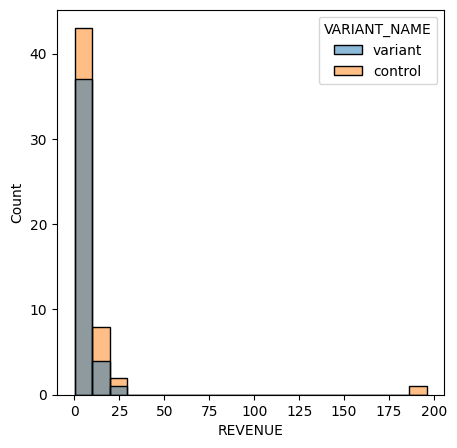

In [40]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df[df['conversion']==1], x='REVENUE', bins=20, hue='VARIANT_NAME');

Исходя из данных по конверсии видно, что группа B хуже, чем группа А

Вывод не выкатывать в продакшн измения, котрые тестировала группа B,
продолжать поиски вариантов для увеличения конверсии и сновать запускать А/В тест